# 使用 K 均值算法来分类安然的财务数据

In [1]:
import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

In [2]:
def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name,dpi=150)
    plt.show()

移除 TOTAL 项目，此处其属于异常值

In [3]:
### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "rb") )

### there's an outlier--remove it! 
data_dict.pop("TOTAL")
print("Removed the outlier.")

Removed the outlier.


In [4]:
# 定义了一个函数来直接给出数据集中某项的最大值和最小值
def min_and_max(obj):
    obj_want_to_check = obj
    max_v = 0
    max_name = None
    for v in data_dict.keys():
        if data_dict[v][obj_want_to_check] != "NaN":
            if data_dict[v][obj_want_to_check] > max_v:
                max_v = data_dict[v][obj_want_to_check]
                max_name = v
    min_v = max_v
    min_name = None
    for v in data_dict.keys():
        if data_dict[v][obj_want_to_check] != "NaN":
            if data_dict[v][obj_want_to_check] < min_v:
                min_v = data_dict[v][obj_want_to_check]
                min_name = v
    print (f"The max value of {obj_want_to_check} is ", max_name, max_v)
    print (f"The min value of {obj_want_to_check} is ", min_name, min_v)
    
min_and_max("exercised_stock_options")
min_and_max("salary")

The max value of exercised_stock_options is  LAY KENNETH L 34348384
The min value of exercised_stock_options is  BELFER ROBERT 3285
The max value of salary is  SKILLING JEFFREY K 1111258
The min value of salary is  BANNANTINE JAMES M 477


In [5]:
### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
#fearure_3 = "total_payments"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

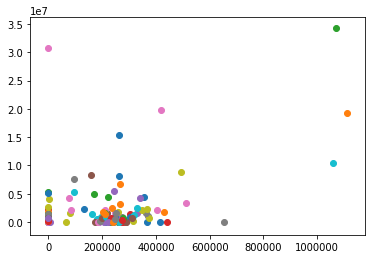

In [6]:
### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.show()

## 以下为使用 Sklearn 中的 KMeans 函数来生成、训练一个 K 均值分类器

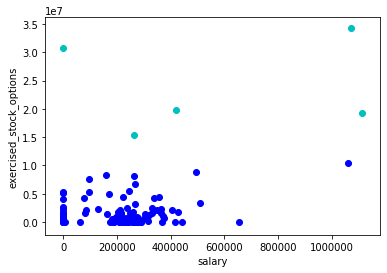

In [7]:
### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred
from sklearn.cluster import KMeans

clst = KMeans(n_clusters=2,n_init=100,max_iter=100)
clst.fit(finance_features)
pred = clst.predict(finance_features)




### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters_2.png", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print ("no predictions object named pred found, no clusters to plot")

## 此时对数据进行特征缩放
这里是使用了两个特征缩放的缩放器，分别处理薪资和股票的数据。

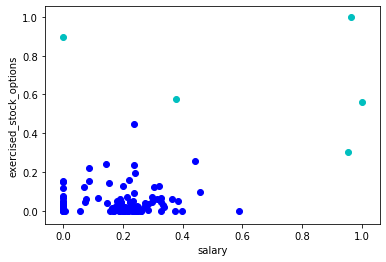

In [19]:
from sklearn.preprocessing import MinMaxScaler
f1_scaler = MinMaxScaler()
f2_scaler = MinMaxScaler()
feature1_list = []
feature2_list = []
for v in data_dict.keys():
    if data_dict[v][feature_1] != "NaN" and data_dict[v][feature_2] != "NaN":
        feature1_list.append([data_dict[v][feature_1]])
        feature2_list.append([data_dict[v][feature_2]])


feature1_list = f1_scaler.fit_transform(feature1_list)
feature2_list = f2_scaler.fit_transform(feature2_list)
new_finance_feature = []
for feature in range(0,len(feature1_list)):
    temp = [feature1_list[feature],feature2_list[feature]]
    new_finance_feature.append(temp)
#print(new_finance_feature)

clst = KMeans(n_clusters=2,n_init=100,max_iter=100)
clst.fit(finance_features)
pred = clst.predict(finance_features)




### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters_scaled.png", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print ("no predictions object named pred found, no clusters to plot")

In [24]:
# 测试两个值在缩放后的输出
print(f1_scaler.transform([[200000.0]]))
print(f2_scaler.transform([[200000]]))
print(f2_scaler.transform([[1000000.0]]))

[[0.17962407]]
[[0.00531945]]
[[0.028622]]
